In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re

from toolz.curried import unique


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [3]:
# path = "results/linear_multi"
path = "Simulations/results/lin"
# path = "results/lin/bym"
all_file = glob.glob(path + "/*.csv")
print(len(all_file))

59


In [4]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
# combined_df['method'] = combined_df['method'].replace({
#     'BYM_1S_rep': 'BYMrep_1S',
#     'BYM_3S_rep': 'BYMrep_3S',
#     'Linear_3S_rep' : 'Linearrep_3S',
#     'Linear_1S_rep' : 'Linearrep_1S',
# })

combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
# combined_df[combined_df["method"] in ["BYM_1S_rep",]]
# print(combined_df.head(5))
print(combined_df['method'].unique())
print(combined_df['model'].unique())
print(combined_df['type'].unique())

['Linear_oracle' 'BYM_oracle' 'Linear_observed' 'BYM_observed' 'Linear_3S'
 'BYM_3S' 'Linear_1S' 'BYM_1S']
['Linear' 'BYM']
['oracle' 'observed' '3S' '1S']


In [5]:
print(combined_df.columns, combined_df.shape)

Index(['idx', 'mean', 'median', 'true', 'bias', 'std', 'RMSE', 'RMSE_all',
       'MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
       'q025', 'q975', 'covering', 'mean_ind_cover', 'method', 'estimand',
       'TRUE', 'model', 'type'],
      dtype='object') (9152, 23)


In [6]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
             'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
                                                                        'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

# combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 
#                                                                         'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [7]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
# combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])
# combined_df['rel_RMSE'] = np.square((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [8]:
# print dtype of each column 
print(combined_df.dtypes)

idx               float64
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
MAPE_all          float64
rel_RMSE          float64
rel_RMSE_all      float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
TRUE              float64
model              object
type               object
abs_bias          float64
ci_length         float64
dtype: object


51
0.46700002


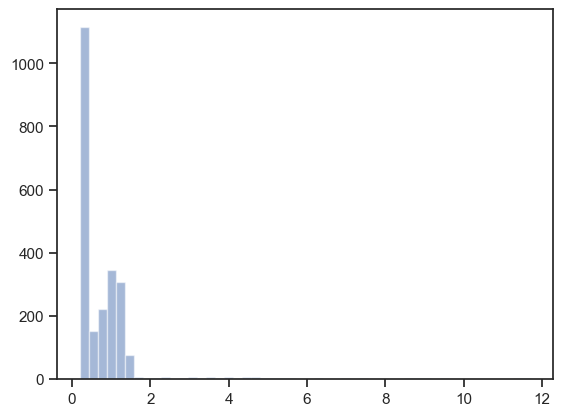

In [9]:
plt.hist(combined_df[combined_df['type'] == '3S']['MAE'], bins=50, alpha=0.5, label='Observed')

err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 3)
print(err_mask.sum())

print(combined_df[combined_df['type'] == '3S']['MAE'].median())


In [10]:
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 3)
err_idx = combined_df[err_mask]['idx'].unique()
combined_df = combined_df[~combined_df['idx'].isin(err_idx)]
print(combined_df.shape)

(8608, 25)


In [17]:
combined_df

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,q975,covering,mean_ind_cover,method,estimand,TRUE,model,type,abs_bias,ci_length
0,1.0,0.528,0.526,0.692,-0.164,0.069,0.294,0.319,0.164,0.168,...,0.666,0.0,0.896,Linear_oracle,dynamic,NaN,Linear,Oracle,0.164,0.269
1,1.0,0.731,0.690,0.692,0.039,0.201,0.227,0.510,0.105,0.185,...,1.228,1.0,1.000,BYM_oracle,dynamic,NaN,BYM,Oracle,0.039,0.765
2,1.0,1.997,1.992,2.620,-0.623,0.258,0.646,0.705,0.623,0.626,...,2.516,0.0,0.050,Linear_oracle,stoch,NaN,Linear,Oracle,0.623,1.010
3,1.0,2.773,2.616,2.620,0.153,0.766,0.171,0.810,0.160,0.568,...,4.665,1.0,1.000,BYM_oracle,stoch,NaN,BYM,Oracle,0.153,2.909
4,1.0,0.278,0.277,0.692,-0.414,0.075,0.567,0.580,0.423,0.427,...,0.425,0.0,0.262,Linear_observed,dynamic,NaN,Linear,Obs.,0.414,0.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,504.0,1.941,1.814,2.620,-0.679,0.593,0.839,1.067,0.701,0.872,...,3.463,1.0,0.990,BYM_3S,stoch,NaN,BYM,3S,0.679,2.258
156,504.0,0.580,0.577,0.692,-0.112,0.090,0.372,0.394,0.257,0.269,...,0.767,1.0,0.426,Linear_1S,dynamic,NaN,Linear,1S,0.112,0.352
157,504.0,0.670,0.646,0.692,-0.022,0.152,0.244,0.390,0.188,0.256,...,1.041,1.0,0.576,BYM_1S,dynamic,NaN,BYM,1S,0.022,0.599
158,504.0,2.154,2.145,2.620,-0.466,0.330,0.619,0.714,0.512,0.573,...,2.839,1.0,0.690,Linear_1S,stoch,NaN,Linear,1S,0.466,1.290


In [18]:
# Save as csv
combined_df.to_csv("Simulations/results/linear_results_combined_iid_and_bym_N500.csv")

In [18]:
# check which rows in combined_df has true == nan
# print(combined_df[combined_df['true'].isna()])
# remove rows with true == nan
combined_df = combined_df[~combined_df['true'].isna()]
print(combined_df.shape)

(8288, 25)


In [ ]:
# TODO: clean all the above in final version

In [ ]:
combined_df = pd.read_csv("Simulations/results/linear_results_combined_iid_and_bym_N500.csv")
# combined_df = pd.read_csv("results/linear_results_combined_N500.csv")
combined_df['rel_RMSE'] = np.sqrt(combined_df['rel_RMSE'])
combined_df['rel_RMSE_all'] = np.sqrt(combined_df['rel_RMSE_all'])

In [22]:
def coverage_perc(x):
    return np.mean(x)*100

def mean_std(x):
    mean,std = np.mean(x), np.std(x)
    return "{:.3f} ({:.3f})".format(mean,std)

combined_df['MAE_rel'] = combined_df['MAE']/combined_df['true']

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {
                                            # 'mean' : ['mean'],
                                         # 'median' : ['mean'],
                                         'bias' : [mean_std],
                                         'std' : [mean_std],
                                         # 'true' : ['mean'],
                                         # 'RMSE' : ['mean'],
                                         'RMSE' : [mean_std],
                                         # 'RMSE_all' : ['mean'],
                                         'RMSE_all' : [mean_std],
                                        #  'MAE' : [mean_std],
                                         'MAE_rel' : [mean_std],
                                         'MAE_all' : [mean_std],
                                         'MAPE' : [mean_std],
                                        'MAPE_all' : [mean_std],
                                         'rel_RMSE' : [mean_std],
                                        'rel_RMSE_all' : [mean_std],
                                        #  'q025' : ['mean'],
                                        #  'q975' : ['mean'],
                                         'ci_length' : [mean_std],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean'],}
                                         # 'norm_coverage' : [coverage_perc]}

                                            ).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

# df_summary.columns = ['estimand','model','type','bias','bias_std', 'rel_RMSE','rel_RMSE_std', 'ci_length','ci_length_std','covering','mean_ind_cover']
df_summary

C:\Users\bar21\AppData\Local\Temp\ipykernel_7776\2837028930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['MAE_rel'] = combined_df['MAE']/combined_df['true']


,estimand,model,type,bias,std,RMSE,RMSE_all,MAE_rel,MAE_all,MAPE,MAPE_all,rel_RMSE,rel_RMSE_all,ci_length,covering,mean_ind_cover
,,,,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,coverage_perc,mean
0,dynamic,BYM,1S,0.013 (0.105),0.202 (0.090),0.308 (0.065),0.514 (0.124),0.341 (0.055),0.310 (0.082),0.250 (0.124),2653.602 (1069.933),0.445 (0.094),0.743 (0.180),0.780 (0.240),100.000000,0.611610
1,dynamic,BYM,3S,-0.205 (0.092),0.223 (0.081),0.384 (0.072),0.648 (0.134),0.405 (0.070),0.386 (0.053),0.387 (0.086),1355.906 (516.284),0.555 (0.105),0.937 (0.193),0.902 (0.320),91.505792,0.826398
2,dynamic,BYM,Obs.,-0.390 (0.297),0.342 (0.173),0.731 (0.407),0.954 (0.378),0.697 (0.344),0.598 (0.256),0.681 (0.374),2224.348 (1539.231),1.056 (0.588),1.378 (0.546),1.065 (0.372),77.992278,0.593502
3,dynamic,BYM,Oracle,0.004 (0.102),0.173 (0.047),0.195 (0.120),0.414 (0.131),0.155 (0.086),0.180 (0.045),0.221 (0.058),0.231 (0.062),0.281 (0.174),0.597 (0.189),0.670 (0.180),98.841699,0.974340
4,dynamic,Linear,1S,-0.131 (0.098),0.094 (0.015),0.411 (0.074),0.434 (0.069),0.411 (0.058),0.296 (0.038),0.229 (0.097),2350.572 (643.074),0.594 (0.107),0.627 (0.099),0.369 (0.058),70.077220,0.420703
5,dynamic,Linear,3S,-0.304 (0.050),0.076 (0.012),0.503 (0.070),0.530 (0.064),0.497 (0.058),0.366 (0.036),0.440 (0.072),1193.066 (277.894),0.727 (0.101),0.766 (0.093),0.299 (0.047),0.772201,0.636680
6,dynamic,Linear,Obs.,-0.384 (0.065),0.070 (0.005),0.570 (0.076),0.582 (0.073),0.589 (0.072),0.413 (0.049),0.556 (0.094),820.201 (352.063),0.823 (0.110),0.841 (0.106),0.276 (0.020),0.000000,0.272166
7,dynamic,Linear,Oracle,-0.157 (0.066),0.070 (0.005),0.321 (0.091),0.346 (0.081),0.237 (0.080),0.177 (0.046),0.235 (0.081),0.213 (0.077),0.463 (0.132),0.501 (0.116),0.275 (0.021),41.505792,0.743259
8,stoch,BYM,1S,0.077 (0.400),0.774 (0.349),0.577 (0.179),1.000 (0.354),0.179 (0.063),0.748 (0.325),0.251 (0.128),0.295 (0.136),0.220 (0.069),0.382 (0.135),2.985 (0.933),99.806950,0.960293


In [23]:
def generate_latex_table(df):
    # Round all numeric columns to 3 decimal places
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].round(3)

    # Start the LaTeX table
    latex_table = "\\begin{table}[htbp]\n\\centering\n\\caption{Simulation Results}\n\\label{tab:simulation_results}\n"
    latex_table += "\\begin{tabular}{lllcccc}\n\\toprule\n"
    # latex_table += "Estimand & Model & Type & Bias (std) & MAPE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"
    # latex_table += "Estimand & Model & Type & Bias (std) & RMSE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"
    latex_table += "Estimand & Model & Type & Bias (std) & Rel. RMSE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"

    # Group by estimand and model
    for e, (estimand, estimand_group) in enumerate(df.groupby('estimand')):
        for m, (model, model_group) in enumerate(estimand_group.groupby('model')):
            if m > 0:
                latex_table += "\\cmidrule{2-7}\n"
                # latex_table += "\\cmidrule{2-6}\n"

            for i, (_, row) in enumerate(model_group.iterrows()):
                if i == 0:
                    if m == 0:
                        latex_table += f"\\multirow{{8}}{{*}}{{{estimand}}} & "
                    else:
                        latex_table += " & "
                    latex_table += f"\\multirow{{4}}{{*}}{{{model}}} "
                else:
                    latex_table += " & "
                
                bias_str = f"{row['bias']:.3f} ({row['bias_std']:.3f})"
                # mape_str = f"{row['MAPE']:.3f} ({row['MAPE_std']:.3f})"
                mape_str = f"{row['rel_RMSE']:.3f} ({row['rel_RMSE_std']:.3f})"
                ci_length_str = f"{row['ci_length']:.3f} ({row['ci_length_std']:.3f})"
                coverage_str = f"{row['covering']:.1f}\\%"
                
                latex_table += f"& {row['type']} & {bias_str} & {mape_str} & {ci_length_str} & {coverage_str} \\\\\n"
                # latex_table += f"& {row['type']} & {mape_str} & {ci_length_str} & {coverage_str} \\\\\n"

        if e == 0:  # Add midrule after first estimand
            latex_table += "\\midrule\n"

    # End the LaTeX table
    latex_table += "\\bottomrule\n\\end{tabular}\n\\end{table}"

    return latex_table


# Assuming your DataFrame is called 'results_df'
latex_table = generate_latex_table(df_summary)
print(latex_table)

\begin{table}[htbp]
\centering
\caption{Simulation Results}
\label{tab:simulation_results}
\begin{tabular}{lllcccc}
\toprule
Estimand & Model & Type & Bias (std) & Rel. RMSE (std) & CI Length (std) & Coverage \\
\midrule
\multirow{8}{*}{dynamic} & \multirow{4}{*}{BYM} & 1S & 0.158 (0.140) & 0.329 (0.213) & 0.892 (0.170) & 94.4\% \\
 & & 3S & -0.119 (0.109) & 0.273 (0.173) & 0.986 (0.308) & 98.8\% \\
 & & Obs. & -0.317 (0.319) & 1.509 (1.740) & 1.081 (0.359) & 81.7\% \\
 & & Oracle & 0.061 (0.107) & 0.157 (0.199) & 0.695 (0.144) & 99.2\% \\
\cmidrule{2-7}
 & \multirow{4}{*}{Linear} & 1S & -0.044 (0.115) & 0.337 (0.115) & 0.392 (0.071) & 84.1\% \\
 & & 3S & -0.237 (0.053) & 0.455 (0.151) & 0.317 (0.045) & 15.5\% \\
 & & Obs. & -0.327 (0.080) & 0.606 (0.205) & 0.312 (0.037) & 3.2\% \\
 & & Oracle & -0.131 (0.072) & 0.232 (0.132) & 0.263 (0.036) & 49.0\% \\
\midrule
\multirow{8}{*}{stoch} & \multirow{4}{*}{BYM} & 1S & 0.413 (0.523) & 0.090 (0.095) & 3.391 (0.636) & 97.2\% \\
 & & 3S & -0.6

Text(0, 0.5, '')

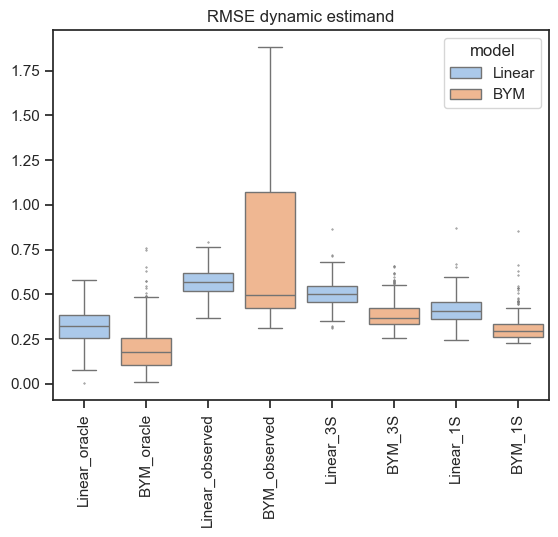

In [ ]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("rel_RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

In [23]:
# Zeigen MAE plots

from matplotlib.ticker import PercentFormatter

plt.style.use('seaborn-v0_8-colorblind')
# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)


zeigen_mae_obs = np.loadtxt('Simulations/results/zeigen_mae_obs.txt')
esti_zeigen_mae_post = np.loadtxt('Simulations/results/esti_zeigen_mae_post.txt')
zeigen_mae_post = np.loadtxt('Simulations/results/zeigen_mae_post.txt')

# remove all values above 3
zeigen_mae_obs = zeigen_mae_obs[zeigen_mae_obs < 3]
esti_zeigen_mae_post = esti_zeigen_mae_post[esti_zeigen_mae_post < 3]
zeigen_mae_post = zeigen_mae_post[zeigen_mae_post < 3]

# print shape of each file
print(zeigen_mae_obs.shape)
print(esti_zeigen_mae_post.shape)
print(zeigen_mae_post.shape)



(598,)
(563,)
(563,)


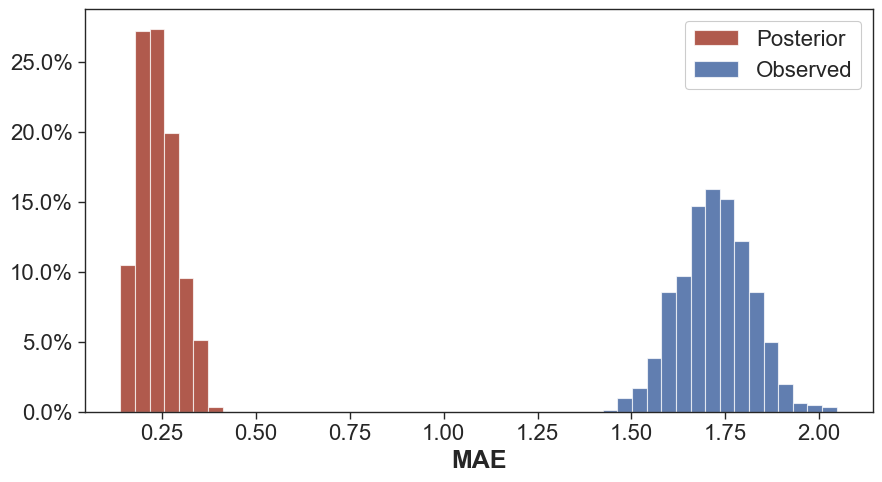

In [30]:
def plot_percentage_histogram(data, bin_edges, ax, label, color, alpha=0.7):
    counts, _ = np.histogram(data, bins=bin_edges, density=True)
    bin_widths = np.diff(bin_edges)
    percentage = counts * bin_widths * 100  # Convert to percentage
    ax.bar(bin_edges[:-1], percentage, width=bin_widths, alpha=alpha, label=label, color=color, align='edge')

fig, ax = plt.subplots(figsize=(9, 5))

# Define common bin edges
common_bin_edges = np.linspace(min(min(zeigen_mae_obs), min(esti_zeigen_mae_post)), 
                               max(max(zeigen_mae_obs), max(esti_zeigen_mae_post)), 
                               50)  

# Plot histograms as density
plot_percentage_histogram(esti_zeigen_mae_post, common_bin_edges, ax, 'Posterior', 'xkcd:brick red')
plot_percentage_histogram(zeigen_mae_obs, common_bin_edges, ax, 'Observed', 'xkcd:cobalt')

# Set labels and title
ax.set_xlabel('MAE', fontsize=18, fontweight='bold')
ax.set_ylabel('')
ax.set_title('')

# Adjust y-axis to show correct percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Increase font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=16)

# Add legend
ax.legend(fontsize=16, frameon=True, fancybox=True, framealpha=1)

# Save the figure
plt.tight_layout()
plt.savefig('Simulations/results/figs/mae_hist.png', dpi=1000)
plt.show()
